<div class="usecase-title">Data Driven Land Use Classification And Growth Forecasting For Melbourne</div>

<div class="usecase-authors"><b>Authored by: Harshith Maddila</b> </div>

<div class="usecase-duration"><b>Duration:</b> 120 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<header>
<h2>Scenario</h2>
<div>
Melbourne is undergoing rapid urban transformation, with changing patterns in land use, population growth, and commercial development. Urban planners, developers, and policymakers face challenges in keeping up with real-time land utilization trends and identifying areas with potential for future growth. Traditional zoning data is often static and may not reflect emerging mixed-use zones or evolving neighborhood profiles.

This project addresses the need for a data-driven approach to classify land use patterns and forecast growth potential using real-world data on residential dwellings and business establishments.. </div>

<header>
<h2>User Story</h2>
As an urban planner or real estate developer, I want to classify different areas of Melbourne based on actual business and residential data so that I can identify mixed-use zones, understand suitable business types for specific regions, and forecast growth potential to make informed urban planning and investment decisions.

<header>
<h2>What this use case will teach you</h2>


This use case provides practical experience in applying data science to urban development, specifically:

1.How to preprocess and integrate multi-source spatial datasets.<br>
2.Feature engineering for geographic and socio-economic analysis.<br>
3.Supervised learning for classification (urban land use zones).<br>
4.Predictive modeling for recommending suitable business types.<br>
5.Forecasting techniques for identifying high-growth potential areas.<br>
6.Creating insightful visualizations (maps, heatmaps, charts).<br>
7.Making real-world, data-backed recommendations for planning and investment.<br>

<header><h2>Indroduction</h2>
<div>
Urban development in cities like Melbourne is becoming increasingly complex due to dynamic population growth, mixed-use infrastructure, and diverse business landscapes. This project focuses on using machine learning and spatial data analysis to better understand and predict land use patterns. Rather than relying solely on traditional zoning data, we leverage actual residential dwelling and business establishment records to reveal evolving trends.By classifying urban zones, predicting suitable business types, and forecasting future growth areas, the project empowers stakeholders to make strategic, forward-looking decisions that contribute to balanced and sustainable city planning.
</div>

<h2>Datasets</h2>
Two core datasets are used in this project:
<ul>
  <li><strong>Residential Dwellings Dataset</strong></br>
    <ul>
      <li>Contains information on dwelling type, quantity, location (lat/lon), and CLUE small area.</li>
      <li>Helps assess residential density and distribution.</li>
    </ul>
  </li>
  <li><strong>Business establishments location and industry classification Dataset</strong><br>
    <ul>
      <li>Includes business names, industry classifications (ANZSIC4), addresses, and spatial data.</li>
      <li>Used to analyse commercial density and diversity across areas.</li>
    </ul>
  </li>
</ul>
These datasets will be cleaned, aggregated, and aligned to form a unified spatial framework for analysis.


<h2>Importing required packages</h2>

In [109]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm


In [111]:
pip install pandas geopandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


<h2>Importing Datasets</h2>
<p>Importing datasets using API

In [114]:
def download_dataset(api_key, dataset_id, base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'):
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1, 
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': api_key
    }

    with requests.get(url, params=params, stream=True) as response:
        if response.status_code == 200:
            total_size = int(response.headers.get('content-length', 0))
            chunk_size = 1024  
            progress_bar = tqdm(total=total_size, unit='iB', unit_scale=True, desc=f"Downloading {dataset_id}")

            content = bytearray()
            for chunk in response.iter_content(chunk_size=chunk_size):
                if chunk:  
                    content.extend(chunk)
                    progress_bar.update(len(chunk))

            progress_bar.close()
            data = pd.read_csv(StringIO(content.decode('utf-8')), delimiter=';')
            return data
        else:
            print(f'Request failed with status code {response.status_code}')
            return None

# Dataset IDs
dataset_ids = ['business-establishments-with-address-and-industry-classification','residential-dwellings']

# Initialize dictionary to hold the datasets
datasets = {}

# Download each dataset with a progress bar
for dataset_id in dataset_ids:
    datasets[dataset_id] = download_dataset('', dataset_id)
    if datasets[dataset_id] is not None:
        print(f"{dataset_id} downloaded successfully.")

# Convert datasets to DataFrames
business_df = datasets['business-establishments-with-address-and-industry-classification']#dataset 2
residential_df = datasets['residential-dwellings']#dataset 3

business-establishments-with-address-and-industry-classification downloaded successfully.


residential-dwellings downloaded successfully.


<h2>Data Exploration</h2>

In [117]:
# Displaying first 5 rows of the business-establishment dataset
business_df.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude,point
0,2008,1007,557160,557160,West Melbourne (Industrial),Australian Bulk Alliance,18 Enterprize Road WEST MELBOURNE 3003,5309,Other Warehousing and Storage Services,144.928829,-37.813597,"-37.8135968481, 144.92882938462844"
1,2008,1007,612871,612871,West Melbourne (Industrial),Port of Melbourne Corporation,Adjacent 499-623 Footscray Road WEST MELBOURNE...,5212,Port and Water Transport Terminal Operations,144.920609,-37.808462,"-37.808461523999995, 144.92060866455546"
2,2008,1007,612881,612881,West Melbourne (Industrial),Port of Melbourne Corporation,74 Appleton Dock Road WEST MELBOURNE 3003,5212,Port and Water Transport Terminal Operations,144.925173,-37.814461,"-37.814461481799995, 144.92517284472797"
3,2008,1007,612882,612882,West Melbourne (Industrial),Vacant,20 Enterprize Road WEST MELBOURNE 3003,0,Vacant Space,144.930528,-37.813192,"-37.81319232635, 144.9305284261212"
4,2008,1009,102954,102954,West Melbourne (Industrial),Victorian Rail Track Corporation,"Rear Level 3, 338-360 Dudley Street WEST MELBO...",4720,Rail Passenger Transport,144.943517,-37.811704,"-37.81170358641947, 144.94351739145"


In [119]:
#  Quick summary of the DataFrame structure
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393878 entries, 0 to 393877
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   census_year                   393878 non-null  int64  
 1   block_id                      393878 non-null  int64  
 2   property_id                   393878 non-null  int64  
 3   base_property_id              393878 non-null  int64  
 4   clue_small_area               393878 non-null  object 
 5   trading_name                  393751 non-null  object 
 6   business_address              393877 non-null  object 
 7   industry_anzsic4_code         393878 non-null  int64  
 8   industry_anzsic4_description  393878 non-null  object 
 9   longitude                     389093 non-null  float64
 10  latitude                      389093 non-null  float64
 11  point                         389093 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory us

In [121]:
# Displaying first 5 rows of the business-establishment dataset
residential_df.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2002,13,103954,103954,381-387 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.961399,-37.818252,"-37.81825225091258, 144.96139854749805"
1,2002,13,106435,106435,21-31 Market Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,111,144.960430,-37.818647,"-37.818646932212395, 144.96042989133713"
2,2002,14,103165,103165,1-5 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.964617,-37.818058,"-37.81805796983434, 144.96461741084877"
3,2002,14,103911,103911,5-7 Flinders Court MELBOURNE 3000,Melbourne (CBD),House/Townhouse,1,144.964163,-37.817759,"-37.817759429593565, 144.96416338914727"
4,2002,14,103949,103949,333 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.963345,-37.817821,"-37.81782053323523, 144.96334455749917"


In [123]:
##  Quick summary of the DataFrame structure
residential_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209162 entries, 0 to 209161
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   census_year       209162 non-null  int64  
 1   block_id          209162 non-null  int64  
 2   property_id       209162 non-null  int64  
 3   base_property_id  209162 non-null  int64  
 4   building_address  209162 non-null  object 
 5   clue_small_area   209162 non-null  object 
 6   dwelling_type     209162 non-null  object 
 7   dwelling_number   209162 non-null  int64  
 8   longitude         206293 non-null  float64
 9   latitude          206293 non-null  float64
 10  location          206293 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.6+ MB


<h2>Data Cleaning</h2>

<h3>Checking for missing values</h3>

In [127]:
# Inspect for Missing Values
print("Missing Values in Business Dataset:")
print(business_df.isnull().sum())

print("\nMissing Values in Residential Dataset:")
print(residential_df.isnull().sum())


Missing Values in Business Dataset:
census_year                        0
block_id                           0
property_id                        0
base_property_id                   0
clue_small_area                    0
trading_name                     127
business_address                   1
industry_anzsic4_code              0
industry_anzsic4_description       0
longitude                       4785
latitude                        4785
point                           4785
dtype: int64

Missing Values in Residential Dataset:
census_year            0
block_id               0
property_id            0
base_property_id       0
building_address       0
clue_small_area        0
dwelling_type          0
dwelling_number        0
longitude           2869
latitude            2869
location            2869
dtype: int64


<h3>Handling missing values</h3>

<h4>Removing Rows with Missing Spatial Coordinates</h4>

In [131]:

# Drop Rows with Missing Coordinates (Latitude/Longitude are critical for spatial analysis)
business_cleaned = business_df.dropna(subset=["latitude", "longitude"])
residential_cleaned = residential_df.dropna(subset=["latitude", "longitude"])


<div>Latitude and longitude are essential for location-based analysis. Records without geographic coordinates cannot be mapped or accurately associated with a CLUE small area, making them unsuitable for spatial aggregation. These rows were removed to ensure all subsequent spatial operations use valid geographic data.</div>

<h3>Removing Duplicates Based on Key Identifying Fields</h3>

In [135]:
# Drop duplicates based on key fields only (not entire row)
residential_cleaned = residential_cleaned.dropna(subset=["clue_small_area", "property_id"])
business_cleaned = business_cleaned.dropna(subset=["clue_small_area", "property_id", "industry_anzsic4_description"])


<div>Instead of dropping rows based on full duplication, this step targets duplicate records that repeat based on key identifiers — such as location, time, and type.

For business data, duplicates may occur due to multiple entries of the same business in the same location and year.

For residential data, it avoids overcounting identical dwelling entries.

This ensures the data reflects unique spatial instances, preventing inflated counts in downstream analysis (like total dwellings or business establishments per area).</div>

<h3>Previewing Cleaned Datasets</h3>

In [139]:
# 👀 Step 6: Preview Cleaned Data
print("Cleaned Business Dataset (First 5 Rows):")
print(business_cleaned.head())

print("\n Cleaned Residential Dataset (First 5 Rows):")
print(residential_cleaned.head())

Cleaned Business Dataset (First 5 Rows):
   census_year  block_id  property_id  base_property_id  \
0         2008      1007       557160            557160   
1         2008      1007       612871            612871   
2         2008      1007       612881            612881   
3         2008      1007       612882            612882   
4         2008      1009       102954            102954   

               clue_small_area                      trading_name  \
0  West Melbourne (Industrial)          Australian Bulk Alliance   
1  West Melbourne (Industrial)     Port of Melbourne Corporation   
2  West Melbourne (Industrial)     Port of Melbourne Corporation   
3  West Melbourne (Industrial)                            Vacant   
4  West Melbourne (Industrial)  Victorian Rail Track Corporation   

                                    business_address  industry_anzsic4_code  \
0             18 Enterprize Road WEST MELBOURNE 3003                   5309   
1  Adjacent 499-623 Footscray Road WE

<h3>Verfing Data Cleaning Process</h3>

In [142]:
print("Missing values in cleaned business data:")
print(business_cleaned.isnull().sum())

print("\nMissing values in cleaned residential data:")
print(residential_cleaned.isnull().sum())



Missing values in cleaned business data:
census_year                      0
block_id                         0
property_id                      0
base_property_id                 0
clue_small_area                  0
trading_name                    95
business_address                 1
industry_anzsic4_code            0
industry_anzsic4_description     0
longitude                        0
latitude                         0
point                            0
dtype: int64

Missing values in cleaned residential data:
census_year         0
block_id            0
property_id         0
base_property_id    0
building_address    0
clue_small_area     0
dwelling_type       0
dwelling_number     0
longitude           0
latitude            0
location            0
dtype: int64


<div>All critical fields for spatial and classification tasks have 0 missing values.Only trading_name (89 missing) and business_address (1 missing) have nulls — which are non-critical for your use case.</h3>

In [145]:
print("\nBusiness columns:", business_cleaned.columns.tolist())
print(business_cleaned.dtypes)

print("\nResidential columns:", residential_cleaned.columns.tolist())
print(residential_cleaned.dtypes)



Business columns: ['census_year', 'block_id', 'property_id', 'base_property_id', 'clue_small_area', 'trading_name', 'business_address', 'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude', 'latitude', 'point']
census_year                       int64
block_id                          int64
property_id                       int64
base_property_id                  int64
clue_small_area                  object
trading_name                     object
business_address                 object
industry_anzsic4_code             int64
industry_anzsic4_description     object
longitude                       float64
latitude                        float64
point                            object
dtype: object

Residential columns: ['census_year', 'block_id', 'property_id', 'base_property_id', 'building_address', 'clue_small_area', 'dwelling_type', 'dwelling_number', 'longitude', 'latitude', 'location']
census_year           int64
block_id              int64
property_id           int

In [147]:
print("Duplicate rows in business data:", business_cleaned.duplicated().sum())
print("Duplicate rows in residential data:", residential_cleaned.duplicated().sum())


Duplicate rows in business data: 0
Duplicate rows in residential data: 0


<h2>Spatial Aggregation</h2>
<p>This step transforms raw, location-level data into a summary profile for each urban area using the <code>"clue small area"</code> field as a geographic grouping unit.</p>

<h4> What We Did:</h4>
<ul>
  <li><strong>Residential Data</strong> was grouped to calculate:
    <ul>
      <li><code>total_dwellings</code> – Total number of dwellings</li>
      <li><code>unique_dwelling_types</code> – Number of distinct housing types</li>
      <li><code>avg_latitude</code> and <code>avg_longitude</code> – Average coordinates for residences</li>
    </ul>
  </li>
  <li><strong>Business Data</strong> was grouped to calculate:
    <ul>
      <li><code>total_businesses</code> – Number of business establishments</li>
      <li><code>unique_industries</code> – Number of distinct industry types (ANZSIC4)</li>
      <li><code>avg_latitude_business</code> and <code>avg_longitude_business</code> – Average business location</li>
    </ul>
  </li>
  <li>Both datasets were <strong>merged on</strong> <code>clue small area</code> to create a unified area-level profile.</li>
</ul>


In [150]:
# Normalize Column Names
# This ensures column names are lowercase and free of extra spaces
business_cleaned.columns = business_cleaned.columns.str.strip().str.lower()
residential_cleaned.columns = residential_cleaned.columns.str.strip().str.lower()

# Aggregate Residential Data by 'clue_small_area'
residential_agg = residential_cleaned.groupby("clue_small_area").agg({
    "dwelling_number": "sum",
    "dwelling_type": "nunique",
    "latitude": "mean",
    "longitude": "mean"
}).reset_index()

# Rename columns for clarity
residential_agg.rename(columns={
    "dwelling_number": "total_dwellings",
    "dwelling_type": "unique_dwelling_types",
    "latitude": "avg_latitude",
    "longitude": "avg_longitude"
}, inplace=True)

# Aggregate Business Data by 'clue_small_area'
business_agg = business_cleaned.groupby("clue_small_area").agg({
    "industry_anzsic4_code": "count",
    "industry_anzsic4_description": "nunique",
    "latitude": "mean",
    "longitude": "mean"
}).reset_index()

# Rename columns for clarity
business_agg.rename(columns={
    "industry_anzsic4_code": "total_businesses",
    "industry_anzsic4_description": "unique_industries",
    "latitude": "avg_latitude_business",
    "longitude": "avg_longitude_business"
}, inplace=True)


residential_agg_cleaned = residential_cleaned.groupby("clue_small_area").agg(
    total_dwellings=('property_id', 'count')
).reset_index()

business_agg_cleaned = business_cleaned.groupby("clue_small_area").agg(
    total_businesses=('property_id', 'count'),
    unique_industries=('industry_anzsic4_description', pd.Series.nunique)
).reset_index()

# Step 3: Merge Both Aggregated Tables
area_profile = pd.merge(residential_agg, business_agg, on="clue_small_area", how="outer")
area_profile_cleaned = pd.merge(residential_agg_cleaned, business_agg_cleaned, on="clue_small_area", how="outer")

# Preview
print(area_profile.head())





   clue_small_area  total_dwellings  unique_dwelling_types  avg_latitude  \
0          Carlton           202846                      3    -37.798174   
1        Docklands           117033                      2    -37.820602   
2   East Melbourne            65007                      3    -37.814006   
3       Kensington            95663                      2    -37.793740   
4  Melbourne (CBD)           380692                      3    -37.812792   

   avg_longitude  total_businesses  unique_industries  avg_latitude_business  \
0     144.969895             28411                230             -37.801128   
1     144.940381             24080                267             -37.817152   
2     144.986718             13609                172             -37.812208   
3     144.925650              9853                237             -37.794009   
4     144.963712            217440                360             -37.814411   

   avg_longitude_business  
0              144.965974  
1     

<h2>Feature Engineering</h2>
<div>This step creates new variables that capture key characteristics of each area based on the aggregated residential and business data. These engineered features provide more meaningful insights for analysis and modeling.</div>

In [154]:

# Feature Engineering
area_profile["business_to_dwelling_ratio"] = area_profile["total_businesses"] / area_profile["total_dwellings"]
area_profile["industry_diversity_score"] = area_profile["unique_industries"] / area_profile["total_businesses"]

# Clean up potential divide-by-zero results
area_profile.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
area_profile.fillna(0, inplace=True)

area_profile_cleaned["business_to_dwelling_ratio"] = area_profile_cleaned["total_businesses"] / area_profile_cleaned["total_dwellings"]
area_profile_cleaned["industry_diversity_score"] = area_profile_cleaned["unique_industries"] / area_profile_cleaned["total_businesses"]
area_profile_cleaned.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
area_profile_cleaned.fillna(0, inplace=True)

# Assign Zone Labels
def classify_zone(ratio):
    if ratio < 0.5:
        return "Residential"
    elif ratio >= 2.0:
        return "Commercial"
    else:
        return "Mixed-use"

area_profile_cleaned["zoning_label"] = area_profile_cleaned["business_to_dwelling_ratio"].apply(classify_zone)

# Count zone types
zone_counts = area_profile_cleaned["zoning_label"].value_counts()
print(zone_counts)



zoning_label
Commercial     6
Mixed-use      4
Residential    3
Name: count, dtype: int64


<h3>Features Created During Feature Engineering</h3>

<ul>
  <li>
    <strong>business_to_dwelling_ratio</strong><br>
    <em>Formula:</em> total_businesses / total_dwellings<br>
    <em>Purpose:</em> Measures the commercial intensity of an area. A higher ratio suggests a commercial or mixed-use zone.
  </li>
  
  <li>
    <strong>industry_diversity_score</strong><br>
    <em>Formula:</em> unique_industries / total_businesses<br>
    <em>Purpose:</em> Captures the diversity of business types in an area. A higher score indicates a more economically diverse zone.
  </li>
  
  <li>
    <strong>zoning_label</strong><br>
    <em>Logic:</em> Assigned based on business_to_dwelling_ratio:
    <ul>
      <li><strong>Residential</strong>: Ratio less than 0.5</li>
      <li><strong>Mixed-use</strong>: Ratio between 0.5 and 2.0</li>
      <li><strong>Commercial</strong>: Ratio 2.0 or more</li>
    </ul>
    <em>Purpose:</em> Predictive zoning classification derived from urban intensity patterns.
  </li>
</ul>


<h2>Exploratory Data Analysis
</h2>

<h4>Top 10 Areas with Highest Residential Density</h4>
<p>
<strong>What it shows:</strong> A bar chart ranking the top 10 CLUE small areas based on total number of residential dwellings.<br>
<strong>Importance:</strong> Identifies the most populated regions — crucial for planning housing, infrastructure, and services.<br>
<strong>Results:</strong> <strong>Melbourne (CBD)</strong>, <strong>Southbank</strong>, and <strong>Carlton</strong> top the list with extremely high dwelling counts, highlighting their role as key residential centers in the city.
</p>

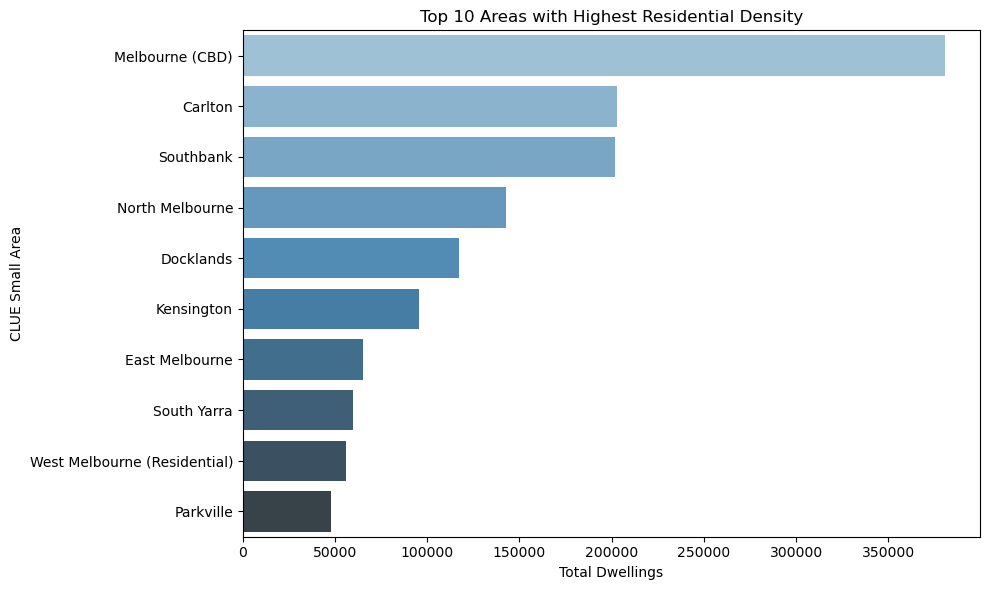

In [159]:
# 📊 Exploratory Data Analysis (EDA) for Spatially Aggregated and Engineered Dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10 high-density areas
top_density_areas = area_profile.sort_values(by="total_dwellings", ascending=False).head(10)

# Plot the result using correct column name
plt.figure(figsize=(10, 6))
sns.barplot(data=top_density_areas, x="total_dwellings", y="clue_small_area", hue="clue_small_area", palette="Blues_d", dodge=False, legend=False)
plt.title("Top 10 Areas with Highest Residential Density")
plt.xlabel("Total Dwellings")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<h4>Top 10 Areas with Highest Number of Businesses</h4>
<p>
<strong>What it shows:</strong> A bar chart displaying the areas with the most commercial establishments.<br>
<strong>Importance:</strong> Helps understand where business activity is concentrated, guiding commercial investment and zoning policies.<br>
<strong>Results:</strong> <strong>Melbourne (CBD)</strong> overwhelmingly leads in business count, followed by <strong>Carlton</strong> and <strong>North Melbourne</strong>, reinforcing their importance as commercial hubs.
</p>

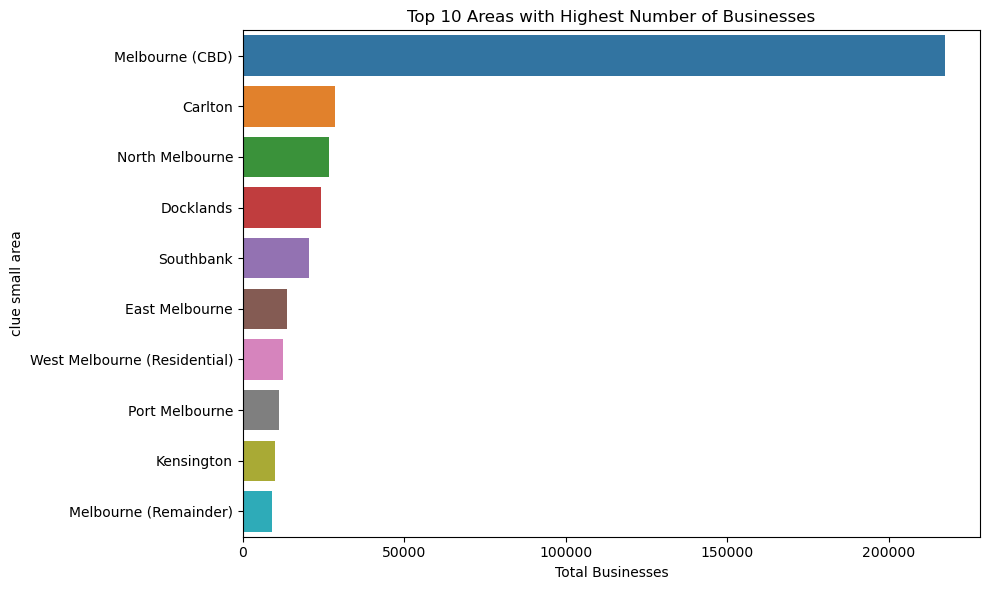

In [162]:
# Top 10 areas with the highest number of businesses

# Sort and select top 10 areas by business count
top_business_areas = area_profile.sort_values(by="total_businesses", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=top_business_areas,
    x="total_businesses",
    y="clue_small_area",
    hue="clue_small_area",        
    dodge=False
)
plt.title("Top 10 Areas with Highest Number of Businesses")
plt.xlabel("Total Businesses")
plt.ylabel("clue small area")
plt.tight_layout()
plt.show()


<h4>Correlation Heatmap: Residential, Business & Diversity Metrics</h4>
<p>
<strong>What it shows:</strong> A heatmap of pairwise correlations between key engineered features including dwellings, businesses, diversity scores, and ratios.<br>
<strong>Importance:</strong> Reveals how features interact with each other — important for modeling, feature selection, and interpretation.<br>
<strong>Results:</strong> There is a strong positive correlation between <strong>total businesses</strong> and <strong>unique industries</strong>, while <strong>industry diversity score</strong> shows weaker or negative correlations — suggesting it captures a different aspect of urban dynamics.
</p>

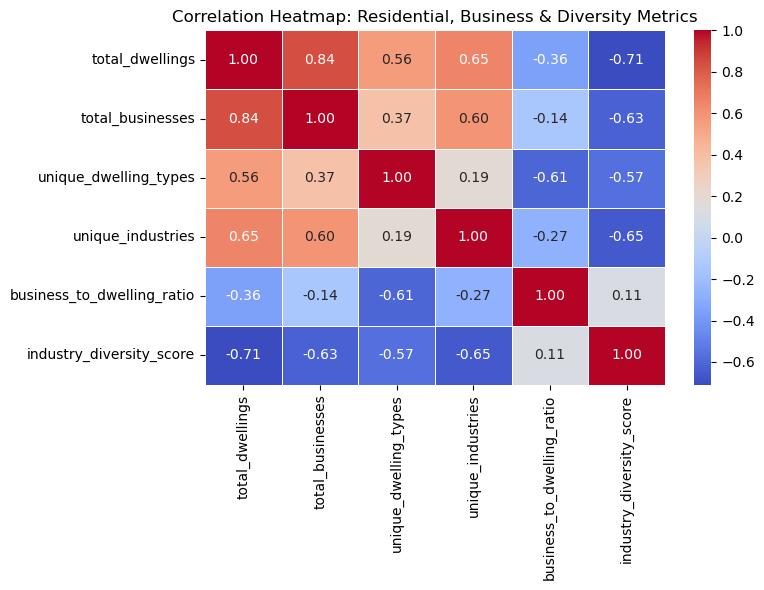

In [165]:
# Correlation between dwellings, businesses, and diversity
correlation_df = area_profile[[
    "total_dwellings", "total_businesses", "unique_dwelling_types",
    "unique_industries", "business_to_dwelling_ratio", "industry_diversity_score"
]]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Residential, Business & Diversity Metrics")
plt.tight_layout()
plt.show()

<h4>Top 10 Most Dense Areas (Residential + Business)</h4>
<p>
<strong>What it shows:</strong> Areas ranked by combined dwelling and business density — identifying urban “hotspots”.<br>
<strong>Importance:</strong> Ideal for <em>urban growth, transit planning</em>, and mixed-use development.<br>
<strong>Results:</strong> <strong>Melbourne (CBD)</strong>, <strong>Carlton</strong>, and <strong>Southbank</strong> dominate as high-density, high-activity areas.
</p>

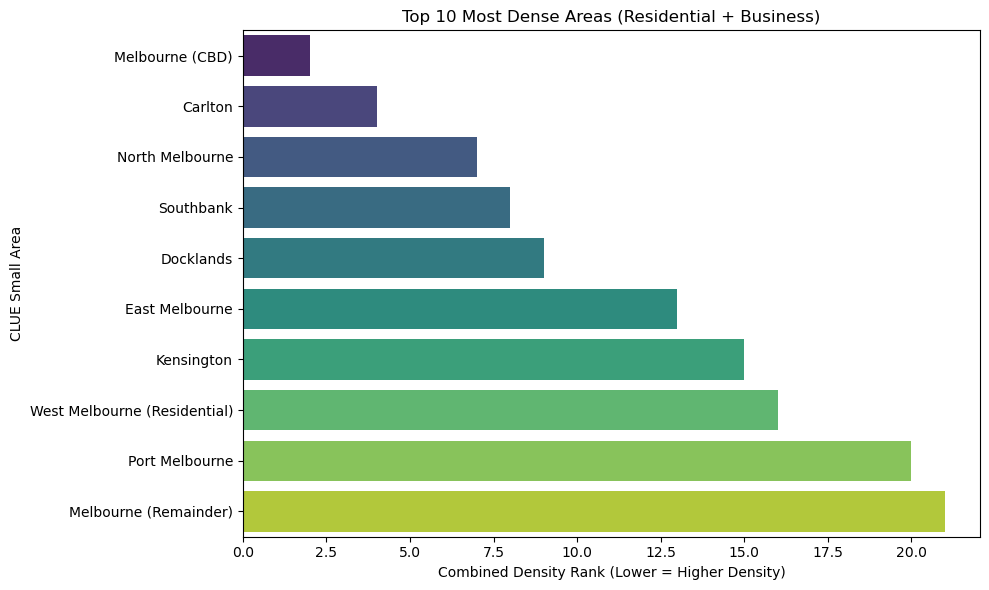

In [168]:
# Top 10 Most Dense Areas (Residential + Business) with corrected legend handling

# Recalculate combined density ranks
area_profile["residential_rank"] = area_profile["total_dwellings"].rank(ascending=False)
area_profile["business_rank"] = area_profile["total_businesses"].rank(ascending=False)
area_profile["combined_rank"] = area_profile["residential_rank"] + area_profile["business_rank"]

# Select top 10 most dense areas
most_dense_areas = area_profile.sort_values(by="combined_rank").head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_dense_areas,
    x="combined_rank",
    y="clue_small_area",
    hue="clue_small_area",
    palette="viridis",
    dodge=False
)
plt.title("Top 10 Most Dense Areas (Residential + Business)")
plt.xlabel("Combined Density Rank (Lower = Higher Density)")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<h4>Zoning Class Distribution</h4>
<p>
<strong>What it shows:</strong> A countplot of how many areas fall into each zoning category: Residential, Mixed-use, or Commercial.<br>
<strong>Importance:</strong> Helps assess class balance — which is crucial for training and evaluating classification models.<br>
<strong>Results:</strong> The dataset has a higher number of <strong>Residential</strong> areas, while <strong>Commercial</strong> zones are fewer. 


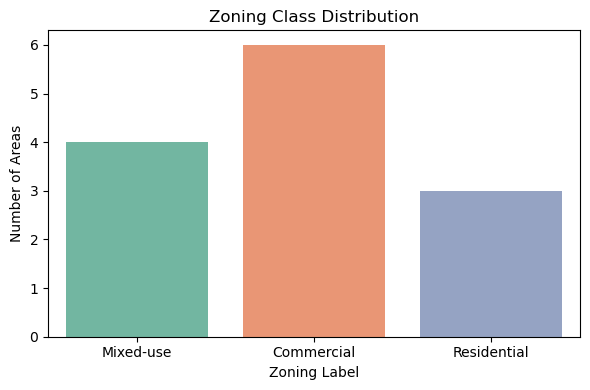

In [171]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=area_profile_cleaned,
    x="zoning_label",
    hue="zoning_label",       
    palette="Set2",
    dodge=False               
)
plt.title("Zoning Class Distribution")
plt.xlabel("Zoning Label")
plt.ylabel("Number of Areas")
plt.tight_layout()
plt.show()


<h3>Top 10 Areas by Industry Diversity</h3>
<p>
This bar chart visualizes the top 10 CLUE small areas in Melbourne based on their <strong>industry diversity</strong>, measured as the number of <em>unique industries</em> present in each area. A higher count indicates a more economically diverse zone, which is often indicative of:
</p>
<ul>
  <li>Better commercial mix and economic resilience</li>
  <li>Higher potential for mixed-use zoning</li>
  <li>Increased opportunity for business growth and innovation</li>
</ul>
<p>
From the chart, <strong>Melbourne (CBD)</strong> stands out with the highest diversity, followed by <strong>North Melbourne</strong> and <strong>Docklands</strong>. These areas are key candidates for strategic urban planning and investment due to their broad industrial representation.
</p>
<p>
This insight is particularly useful in zoning classification tasks and helps planners identify zones that support a healthy mix of services, retail, and enterprise.
</p>


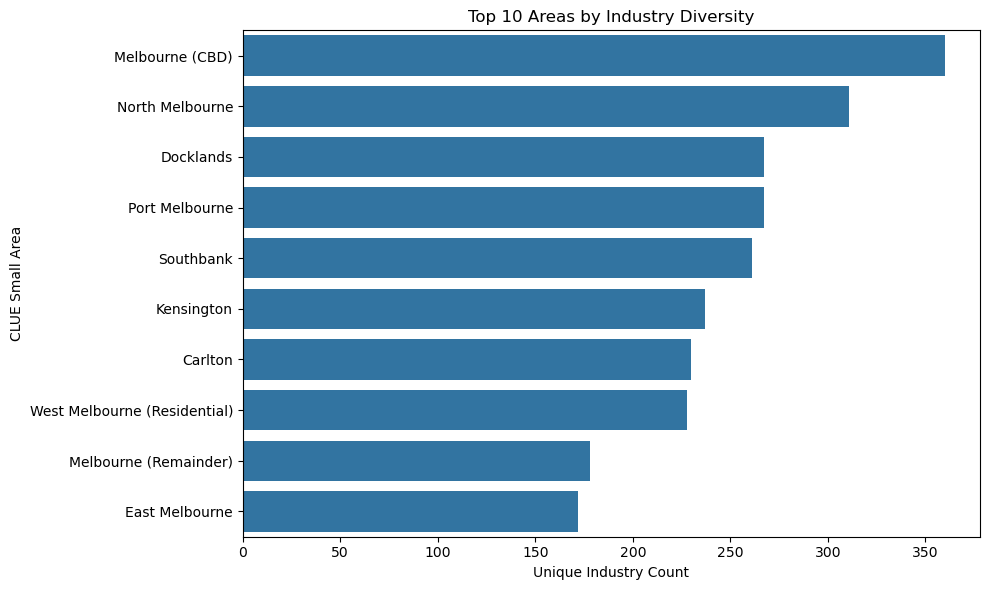

In [174]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_diversity,
    y="clue_small_area",
    x="unique_industries"
)
plt.title("Top 10 Areas by Industry Diversity")
plt.xlabel("Unique Industry Count")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<h3>Joint Plot: Total Dwellings vs Unique Industries</h3>
<p>
This chart explores the relationship between <strong>residential density</strong> and <strong>economic diversity</strong> in various CLUE small areas across Melbourne.
</p>

<ul>
  <li><strong>X-axis:</strong> Total Dwellings</li>
  <li><strong>Y-axis:</strong> Unique Industries</li>
</ul>

<p>
The center scatter plot shows individual areas, while the regression line provides a trend of how industry diversity changes with dwelling count. Marginal histograms display the distributions of each variable independently.
</p>

<h4>Purpose and Use:</h4>
<ul>
  <li>Reveals whether densely populated areas also support a wide range of industries</li>
  <li>Helps identify zones suited for <em>mixed-use development</em></li>
  <li>Useful for zoning strategy and urban planning decisions</li>
</ul>

<h4>Analysis:</h4>
<p>
The joint plot shows a <strong>moderate positive correlation</strong> between total dwellings and unique industries. This indicates that as residential density increases, there is generally a corresponding increase in the number of distinct industries present in that area.
</p>
<p>
This pattern suggests that areas with more residents tend to attract or sustain more varied business activity. Urban planners can use this insight to support infrastructure development, commercial zoning, and economic diversification strategies in growing suburbs.
</p>


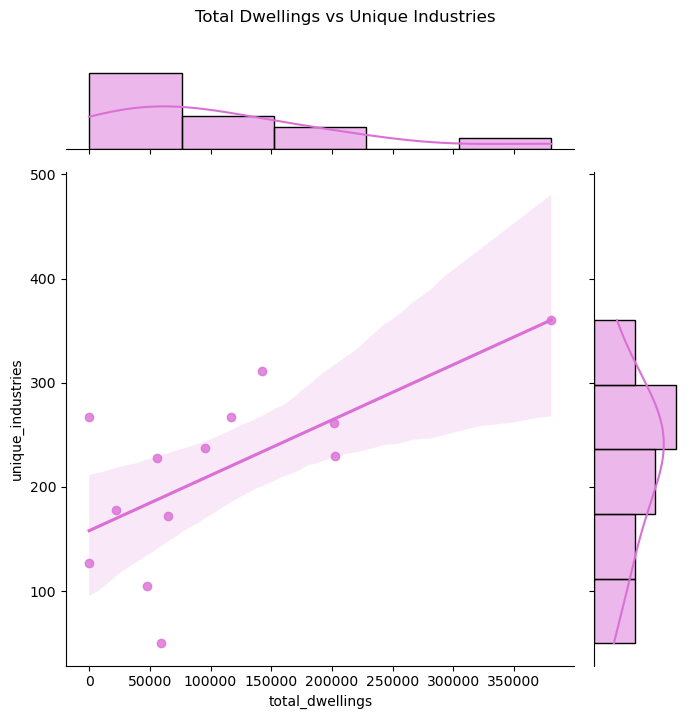

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot: Total Dwellings vs Unique Industries
sns.jointplot(
    data=area_profile,
    x="total_dwellings",
    y="unique_industries",
    kind="reg",
    height=7,
    color="orchid"
).fig.suptitle("Total Dwellings vs Unique Industries", y=1.02)

plt.tight_layout()
plt.show()


<h3>Violin Plot: Industry Diversity by Dwelling Density</h3>
<p>
This plot categorizes each CLUE small area into four quartiles based on its total dwelling count. It then shows how the number of unique industries varies across these dwelling density levels.
</p>
<ul>
  <li><strong>X-axis:</strong> Dwelling density category (Low → Very High)</li>
  <li><strong>Y-axis:</strong> Unique industries</li>
</ul>
<h4>Purpose:</h4>
<ul>
  <li>Reveals how economic diversity changes with increasing residential presence</li>
  <li>Highlights the spread and median of industry counts in each category</li>
</ul>
<h4>Analysis:</h4>
<p>
The plot shows that <strong>medium to high dwelling density</strong> areas tend to support a wider variety of industries. However, some low-density zones also show high diversity, indicating pockets of commercial clusters. Very high-density areas show more variability, potentially due to zoning or population pressure.
</p>


C:\Users\maddi\AppData\Local\Temp\ipykernel_55932\3434942162.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()            # remove duplicate legend


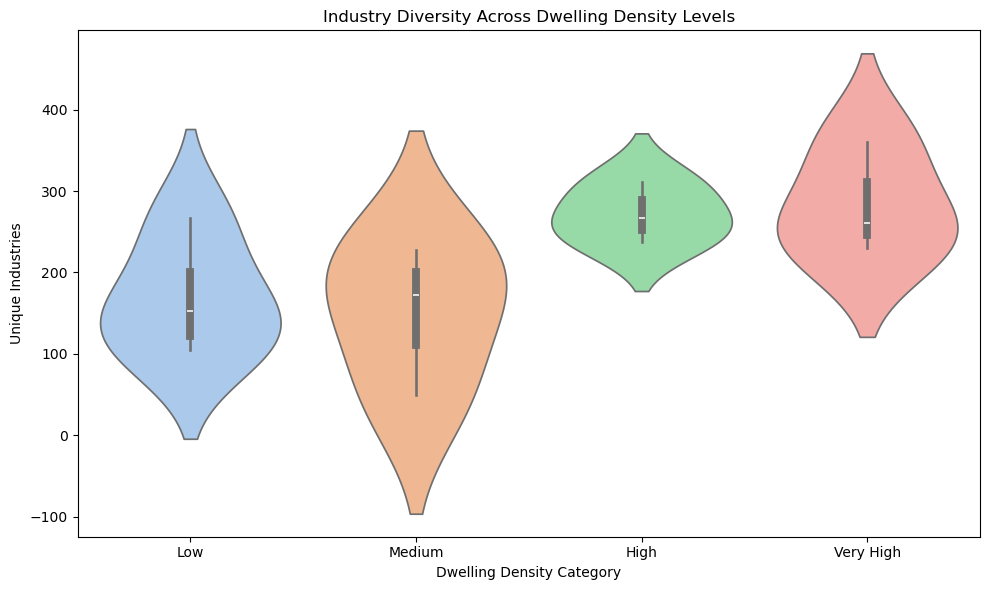

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize total dwellings into quartiles
area_profile["dwelling_category"] = pd.qcut(
    area_profile["total_dwellings"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# Violin Plot (fixed warning with hue and legend disabled)
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=area_profile,
    x="dwelling_category",
    y="unique_industries",
    hue="dwelling_category",     # required for palette to apply correctly
    palette="pastel",
    dodge=False                  # keep violins aligned
)
plt.legend().remove()            # remove duplicate legend
plt.title("Industry Diversity Across Dwelling Density Levels")
plt.xlabel("Dwelling Density Category")
plt.ylabel("Unique Industries")
plt.tight_layout()
plt.show()


<h3>Heatmap: Normalized Area Metrics</h3>
<p>
This heatmap compares three important metrics—<strong>total dwellings</strong>, <strong>total businesses</strong>, and <strong>unique industries</strong>—across the top 20 CLUE small areas. Each metric is normalized from 0 to 1 using min-max scaling.
</p>
<h4>Purpose:</h4>
<ul>
  <li>Provides a quick visual comparison of area profiles</li>
  <li>Helps detect imbalances or unique strengths (e.g., high business but low dwellings)</li>
</ul>
<h4>Analysis:</h4>
<p><strong>Melbourne (CBD)</strong> stands out with the highest normalized scores across all three metrics, indicating a dense, well-rounded urban zone. </p>
<p><strong>Docklands</strong> shows strong industry diversity, but lags in total dwellings and businesses, reflecting a more specialized economic footprint.</p>
<p>Other zones, such as <strong>Carlton</strong> and <strong>Kensington</strong>, display high dwelling values with relatively fewer businesses, indicating a residential skew.</p>
<p>This heatmap helps highlight urban imbalances and supports data-driven zoning or infrastructure strategies.</p>

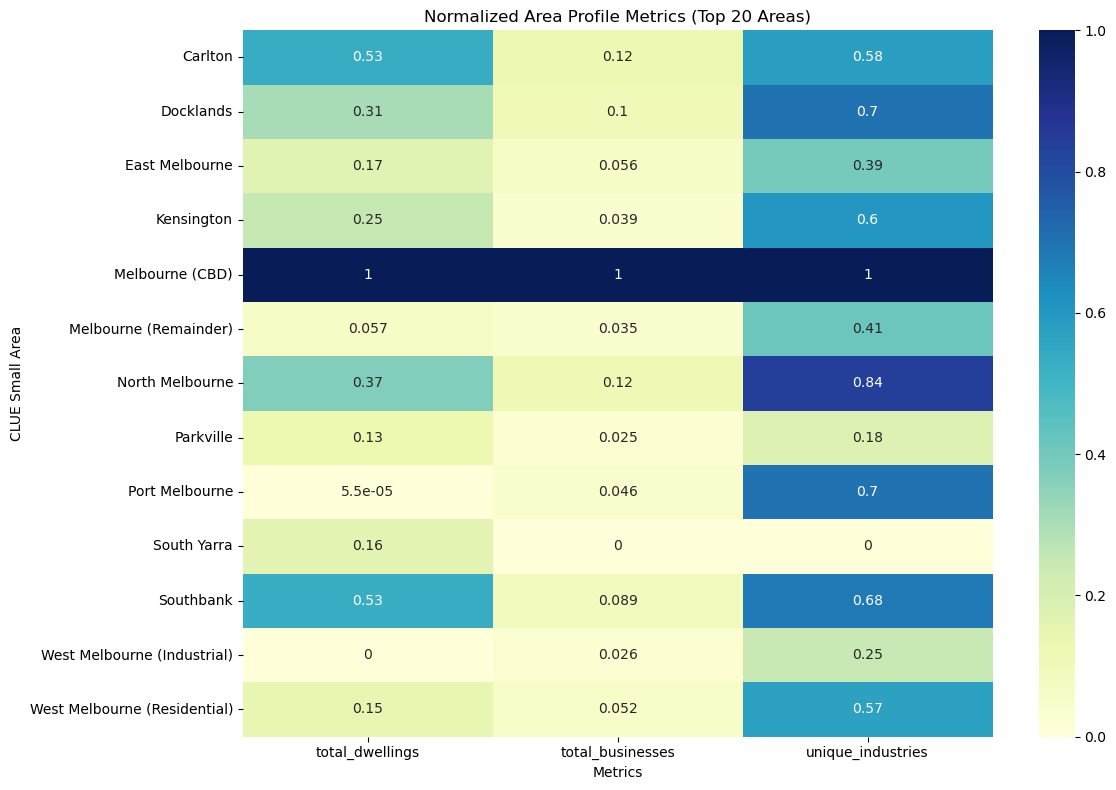

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Select key metrics and scale them
metrics = area_profile[["total_dwellings", "total_businesses", "unique_industries"]].copy()
metrics.index = area_profile["clue_small_area"]
scaler = MinMaxScaler()
metrics_scaled = pd.DataFrame(scaler.fit_transform(metrics), columns=metrics.columns, index=metrics.index)

# Plot heatmap for top 20 areas
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_scaled.head(20), annot=True, cmap="YlGnBu")
plt.title("Normalized Area Profile Metrics (Top 20 Areas)")
plt.xlabel("Metrics")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<h3>Top 15 Areas by Business Concentration Score</h3>
<p>
This chart displays the <strong>business concentration score</strong>, defined as the ratio of <em>unique industries</em> to <em>total businesses</em> in each CLUE small area. A higher score indicates a more diverse local economy.
</p>

<h4>Insights:</h4>
<ul>
  <li>Top-scoring areas have <strong>high economic diversity</strong> despite having fewer businesses overall, suggesting a balanced mix of services.</li>
  <li>These zones could be <em>resilient to market fluctuations</em> and attractive for new business entries.</li>
  <li>Great for identifying <strong>strategic areas for SME development</strong> or <strong>local entrepreneurship support</strong>.</li>
</ul>


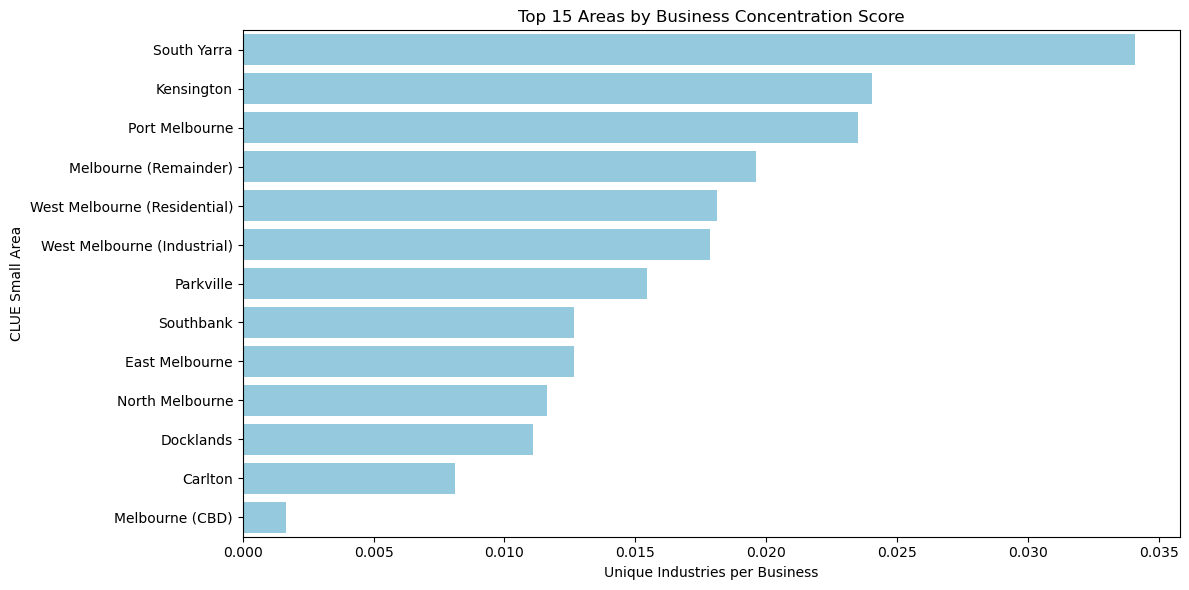

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate Business Concentration Score
area_profile["business_concentration_score"] = (
    area_profile["unique_industries"] / area_profile["total_businesses"].replace(0, pd.NA)
)

# Step 2: Sort and select top 15 areas
top_concentration = area_profile.sort_values("business_concentration_score", ascending=False).head(15)

# Step 3: Plot horizontal bar chart (no hue, safe for future seaborn versions)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_concentration,
    x="business_concentration_score",
    y="clue_small_area",
    color="skyblue"  # Use a single color safely
)
plt.title("Top 15 Areas by Business Concentration Score")
plt.xlabel("Unique Industries per Business")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<html>
<body>
<h2>Supervised Classification of Urban Land Use Zones</h2>

<p>This section applies supervised machine learning models to classify each urban area into one of the land use zones: <strong>Residential</strong>, <strong>Commercial</strong>, or <strong>Mixed-use</strong>, based on the derived spatial and socio-economic features.</p>

<h3> Features Used:</h3>
<ul>
  <li><code>total_dwellings</code>: Number of residential dwellings in the area</li>
  <li><code>total_businesses</code>: Number of businesses registered in the area</li>
  <li><code>unique_industries</code>: Diversity of industry types (using ANZSIC codes)</li>
  <li><code>business_to_dwelling_ratio</code>: Ratio of businesses to dwellings</li>
  <li><code>industry_diversity_score</code>: Proportion of unique industries to total businesses</li>
</ul>

<h3> Target Variable:</h3>
<p>The <code>zoning_label</code> column was label-encoded into numeric format to serve as the classification target (Residential = 3, Mixed-use = 4, Commercial = 6, etc.).</p>

<h3> Models Applied:</h3>
<ul>
  <li><strong>Random Forest Classifier</strong>: An ensemble model that uses multiple decision trees and averages their output</li>
  <li><strong>Decision Tree Classifier</strong>: A tree-based model that splits features into decision rules</li>
  <li><strong>Support Vector Machine (Linear Kernel)</strong>: A linear classifier that attempts to find the best separating hyperplane</li>
</ul>

<h3> Evaluation Method:</h3>
<p>All models were evaluated using <strong>3-fold cross-validation</strong> on the full dataset. This method ensures the model accuracy is not biased by a particular train-test split. The output includes the mean accuracy and individual fold scores for each model.</p>

<h3> Outcome:</h3>
<p>The comparison of model performances provides insight into which algorithm generalizes best for zoning classification. These scores guide the selection of the most reliable model for future use in predicting zoning labels for new or unclassified areas.</p>
</body>                                                                                                            
</html>

In [189]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Encode the zone_label (target)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(area_profile_cleaned["zoning_label"])

# Select feature columns for modeling
X = area_profile_cleaned[[
    "total_dwellings",
    "total_businesses",
    "unique_industries",
    "business_to_dwelling_ratio",
    "industry_diversity_score"
]]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42)
}

# Evaluate using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=3)
    results[name] = {
        "mean_accuracy": scores.mean(),
        "all_scores": scores
    }

# Print model comparison
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean_accuracy']:.2f} (Scores: {metrics['all_scores']})")


Random Forest: 0.85 (Scores: [0.8  0.75 1.  ])
Decision Tree: 0.93 (Scores: [0.8 1.  1. ])
SVM (Linear): 1.00 (Scores: [1. 1. 1.])


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">

  <style>
    body {
      font-family: Arial, sans-serif;
      background: #f9f9f9;
      color: #333;
      padding: 20px;
      line-height: 1.6;
    }
    h2 {
      color: #2c3e50;
    }
    ul {
      margin-top: 0;
    }
    code {
      background-color: #eee;
      padding: 2px 6px;
      border-radius: 4px;
    }
    .section {
      background-color: #ffffff;
      border-left: 5px solid #3498db;
      padding: 15px;
      margin-bottom: 20px;
      box-shadow: 0 0 5px rgba(0,0,0,0.1);
    }
  </style>
</head>
<body>

  <h2>Predictive Modeling for Recommending Suitable Business Types</h2>

  <div class="section">
    <p>This section builds a machine learning model to recommend industry types that are best suited for a specific urban area based on its socio-economic and spatial characteristics. The model uses historical business distribution patterns to learn and generalize where specific industries are more likely to thrive.</p>
  </div>

  <div class="section">
    <h3>Input Features</h3>
    <ul>
      <li><code>total_dwellings</code>: Total number of residential units</li>
      <li><code>total_businesses</code>: Total number of businesses</li>
      <li><code>unique_industries</code>: Count of distinct industry types</li>
      <li><code>business_to_dwelling_ratio</code>: Businesses per dwelling</li>
      <li><code>industry_diversity_score</code>: Industry diversity relative to total businesses</li>
    </ul>
  </div>

  <div class="section">
    <h3> Target Variable</h3>
    <p>For each <code>clue_small_area</code>, the target is a list of <strong>industry types</strong> that exist there. We treat this as a <strong>multi-label classification</strong> problem because each area may host multiple business types.</p>
  </div>

  <div class="section">
    <h3> Model Used</h3>
    <p>A <strong>Random Forest Classifier</strong> wrapped inside a <code>MultiOutputClassifier</code> is used to predict multiple industry labels at once. This allows the model to recommend more than one suitable business type for a given area's profile.</p>
  </div>

  <div class="section">
    <h3>Sample Predictions</h3>
    <ul>
      <li><strong>Mixed-Use Area Input:</strong> <code>{ dwellings=5000, businesses=6000, diversity_score=0.02 }</code></li>
      <li><strong>Residential Area Input:</strong> <code>{ dwellings=8000, businesses=500, diversity_score=0.04 }</code></li>
    </ul>
    <p>For each input, the model outputs a ranked list of the <strong>Top 10 most recommended industry types</strong> based on predicted probabilities.</p>
  </div>

  <div class="section">
    <h3>Outcome</h3>
    <p>The output helps urban developers and policymakers determine what types of businesses are best aligned with the characteristics of a neighborhood. It can guide zoning, infrastructure investment, and retail strategy decisions in high-growth or underdeveloped areas.</p>
  </div>

</body>
</html>


In [192]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Prepare binary industry labels per area
business_df.columns = business_df.columns.str.strip().str.lower()

# Group by area and aggregate all industries into a list
industry_labels = (
    business_df
    .groupby("clue_small_area")["industry_anzsic4_description"]
    .apply(lambda x: list(set(x)))
    .reset_index()
    .rename(columns={"industry_anzsic4_description": "industry_list"})
)

# Merge with area profile
multi_label_df = pd.merge(area_profile_cleaned, industry_labels, on="clue_small_area", how="inner")

# Fix missing columns
multi_label_df["business_to_dwelling_ratio"] = multi_label_df["total_businesses"] / multi_label_df["total_dwellings"]
multi_label_df["industry_diversity_score"] = multi_label_df["unique_industries"] / multi_label_df["total_businesses"]
multi_label_df.replace([np.inf, -np.inf], 0, inplace=True)
multi_label_df.fillna(0, inplace=True)

# Transform targets using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(multi_label_df["industry_list"])

# Now select features
X = multi_label_df[[
    "total_dwellings",
    "total_businesses",
    "unique_industries",
    "business_to_dwelling_ratio",
    "industry_diversity_score"
]]

# Train/Test split and Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a multi-output classifier using Random Forest
multi_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_model.fit(X_train, Y_train)

# Predict for test set
Y_pred = multi_model.predict(X_test)

# Example: predict for one new mixed-use-like sample
sample = pd.DataFrame([{
    "total_dwellings": 5000,
    "total_businesses": 6000,
    "unique_industries": 120,
    "business_to_dwelling_ratio": 1.2,
    "industry_diversity_score": 0.02
}])

residential_sample = pd.DataFrame([{
    "total_dwellings": 8000,            # high dwellings
    "total_businesses": 500,            # few businesses
    "unique_industries": 20,            # low variety
    "business_to_dwelling_ratio": 0.0625,  # very low ratio
    "industry_diversity_score": 0.04     # low diversity
}])

# Get positive class probabilities for each industry safely
probs_flat = np.array([
    prob[1] if len(prob) > 1 else prob[0]
    for prob in [clf.predict_proba(sample)[0] for clf in multi_model.estimators_]
])

# Sort and get top N industry indices
top_n = 10
top_indices = np.argsort(probs_flat)[-top_n:][::-1]

# Map indices to industry names
top_industries = [mlb.classes_[i] for i in top_indices]

# Print the top recommendations
print("Top Recommended Industries for New Area:")
for industry in top_industries:
    print("•", industry)

# Get positive class probabilities for each industry safely
probs_flat = np.array([
    prob[1] if len(prob) > 1 else prob[0]
    for prob in [clf.predict_proba(residential_sample)[0] for clf in multi_model.estimators_]
])

# Sort and get top N industry indices
top_n = 10
top_indices = np.argsort(probs_flat)[-top_n:][::-1]

# Map indices to industry names
top_industries = [mlb.classes_[i] for i in top_indices]

# Print the top recommendations
print("Top Recommended Industries for New Area:")
for industry in top_industries:
    print("•", industry)





Top Recommended Industries for New Area:
• Accommodation
• Hairdressing and Beauty Services
• Higher Education
• Pharmaceutical, Cosmetic and Toiletry Goods Retailing
• Other Personal Services n.e.c.
• Other Telecommunications Services
• Takeaway Food Services
• Supermarket and Grocery Stores
• Knitted Product Manufacturing
• Land Development and Subdivision
Top Recommended Industries for New Area:
• Accommodation
• Legal Services
• Nature Reserves and Conservation Parks Operation
• Newspaper and Book Retailing
• Non-Residential Building Construction
• Non-Residential Property Operators
• Other Administrative Services n.e.c.
• Technical and Vocational Education and Training
• Other Allied Health Services
• Takeaway Food Services


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">

  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #f9f9f9;
      color: #333;
      padding: 20px;
    }
    h2 {
      color: #2e86de;
    }
    code {
      background-color: #f2f2f2;
      padding: 2px 5px;
      border-radius: 4px;
    }
    .section {
      background-color: #ffffff;
      border-left: 5px solid #00b894;
      padding: 15px;
      margin-bottom: 20px;
      box-shadow: 0 0 5px rgba(0,0,0,0.05);
    }
  </style>
</head>
<body>

  <h2>Forecasting High-Growth Potential Areas</h2>

  <div class="section">
    <p>This section introduces a composite metric called <strong>growth_score</strong> to identify urban zones with high potential for development and investment. The score integrates multiple spatial and economic indicators into a single, weighted formula.</p>
  </div>

  <div class="section">
    <h3> Growth Score Formula</h3>
    <p>The <code>growth_score</code> is calculated as a weighted average of:</p>
    <ul>
      <li><strong>50%</strong> – <code>industry_diversity_score</code>: how diverse the business types are in the area</li>
      <li><strong>30%</strong> – <code>business_to_dwelling_ratio</code>: ratio of businesses to dwellings</li>
      <li><strong>20%</strong> – <code>unique_industries / total_businesses</code>: richness of industry mix</li>
    </ul>
    <p>This formula prioritizes areas that are not only commercially dense, but also economically diverse and balanced with residential population.</p>
  </div>

  <div class="section">
    <h3>Top Growth Zones</h3>
    <p>The top 10 areas with the highest <code>growth_score</code> are extracted using a descending sort. These zones are ideal targets for:</p>
    <ul>
      <li>Urban infrastructure upgrades</li>
      <li>Mixed-use development projects</li>
      <li>Attracting strategic businesses or industries</li>
    </ul>
  </div>

  <div class="section">
    <h3> Outcome</h3>
    <p>This approach provides a data-driven alternative to static zoning decisions, helping planners and policymakers proactively identify emerging high-potential zones across the city.</p>
     <ul>
  <li><strong>West Melbourne (Industrial)</strong> and <strong>Port Melbourne</strong> stand out with extremely high growth scores, indicating strong commercial density and exceptional economic diversity.</li>
  <li><strong>Melbourne CBD</strong>, <strong>Southbank</strong>, and <strong>Docklands</strong> follow with moderate scores, reflecting balanced growth potential suited for mixed-use or business expansion.</li>
  <li>Remaining areas have significantly lower scores, indicating limited but possible opportunities for focused development or diversity improvements.</li>
</ul>

  </div>

</body>
</html>


In [194]:
# Growth score calculation (composite weighted score)
area_profile_cleaned["growth_score"] = (
    0.5 * area_profile_cleaned["industry_diversity_score"] +
    0.3 * area_profile_cleaned["business_to_dwelling_ratio"] +
    0.2 * (area_profile_cleaned["unique_industries"] / area_profile_cleaned["total_businesses"])
)


# Get top 10 high-growth zones
top_growth_zones = area_profile_cleaned.sort_values("growth_score", ascending=False).head(10)

# Print results
print("🔝 Top High-Growth Potential Areas:")
print(top_growth_zones[["clue_small_area", "growth_score"]])

🔝 Top High-Growth Potential Areas:
                 clue_small_area  growth_score
11   West Melbourne (Industrial)    710.812507
8                 Port Melbourne    142.103942
4                Melbourne (CBD)      9.479799
5          Melbourne (Remainder)      7.945809
10                     Southbank      5.019334
1                      Docklands      3.678493
12  West Melbourne (Residential)      0.290032
2                 East Melbourne      0.276039
0                        Carlton      0.251231
6                North Melbourne      0.196453


<h3>Z-Score Heatmap: Top 15 Growth Areas</h3>
<p>
This heatmap shows a <strong>standardized comparison (Z-scores)</strong> of key urban metrics across the top 15 CLUE small areas ranked by their <strong>growth score</strong>. The metrics included are:
</p>
<ul>
  <li>Total Dwellings</li>
  <li>Total Businesses</li>
  <li>Unique Industry Types</li>
  <li>Business-to-Dwelling Ratio</li>
</ul>

<h4>Purpose:</h4>
<p>
Z-score normalization rescales each feature to highlight which areas are performing <em>above or below the average</em> in each metric. A value close to <strong>+2</strong> means the area is well above average in that metric, while values near <strong>-2</strong> indicate it's below average.
</p>

<h4>Insights from Results:</h4>
<ul>
  <li><strong>Melbourne (CBD)</strong> stands out with high Z-scores in <em>total businesses</em> and <em>industry diversity</em>, reflecting strong commercial and economic variety, but shows below-average dwelling density.</li>
  <li><strong>West Melbourne (Industrial)</strong> shows extreme specialization, with a very high <em>business-to-dwelling ratio</em> but low scores in other categories.</li>
  <li><strong>Docklands</strong> demonstrates a moderate profile with slightly above-average industry diversity, but does not dominate any metric.</li>
  <li>Several areas such as <strong>Carlton</strong> and <strong>North Melbourne</strong> are strong in one or two metrics (like dwellings or diversity), while underperforming in others — indicating specialized development.</li>
  <li>This heatmap helps planners identify where urban growth is <strong>imbalanced</strong> or where hidden <strong>potential exists</strong> by comparing all zones on standardized terms.</li>
</ul>


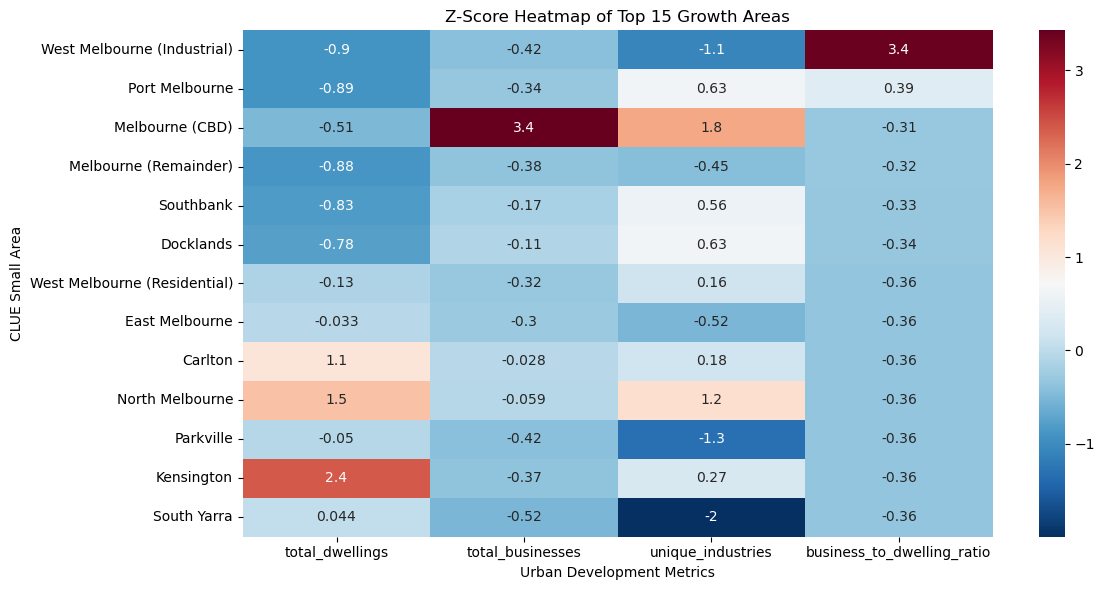

In [198]:
# Import required library
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Define key features to include in heatmap
features = ["total_dwellings", "total_businesses", "unique_industries", "business_to_dwelling_ratio"]

# Step 2: Select top 15 areas by growth score
top15 = area_profile_cleaned.sort_values("growth_score", ascending=False).head(15).copy()

# Step 3: Standardize the values using Z-score normalization
scaler = StandardScaler()
z_scores = pd.DataFrame(
    scaler.fit_transform(top15[features]),
    columns=features,
    index=top15["clue_small_area"]
)

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(z_scores, cmap="RdBu_r", annot=True)
plt.title("Z-Score Heatmap of Top 15 Growth Areas")
plt.xlabel("Urban Development Metrics")
plt.ylabel("CLUE Small Area")
plt.tight_layout()
plt.show()


<h3>Dual-Axis Line Plot: Dwellings vs Businesses</h3>
<p>
This dual-axis line plot compares <strong>total dwellings</strong> and <strong>total businesses</strong> across all CLUE small areas, sorted in descending order of their growth score.
</p>

<h4>Purpose:</h4>
<ul>
  <li>Provides a side-by-side visual of <em>residential and commercial distribution</em>.</li>
  <li>Highlights zones where one metric outpaces the other.</li>
</ul>

<h4>Insights:</h4>
<ul>
  <li>Areas like <strong>Melbourne CBD</strong> and <strong>Docklands</strong> show strong performance on both axes — signaling a healthy mix of residents and businesses.</li>
  <li>Some areas have higher dwelling counts but fewer businesses, suggesting <em>potential for commercial expansion</em>.</li>
  <li>Other zones are business-heavy with fewer dwellings, marking them as <em>commercial cores</em>.</li>
</ul>


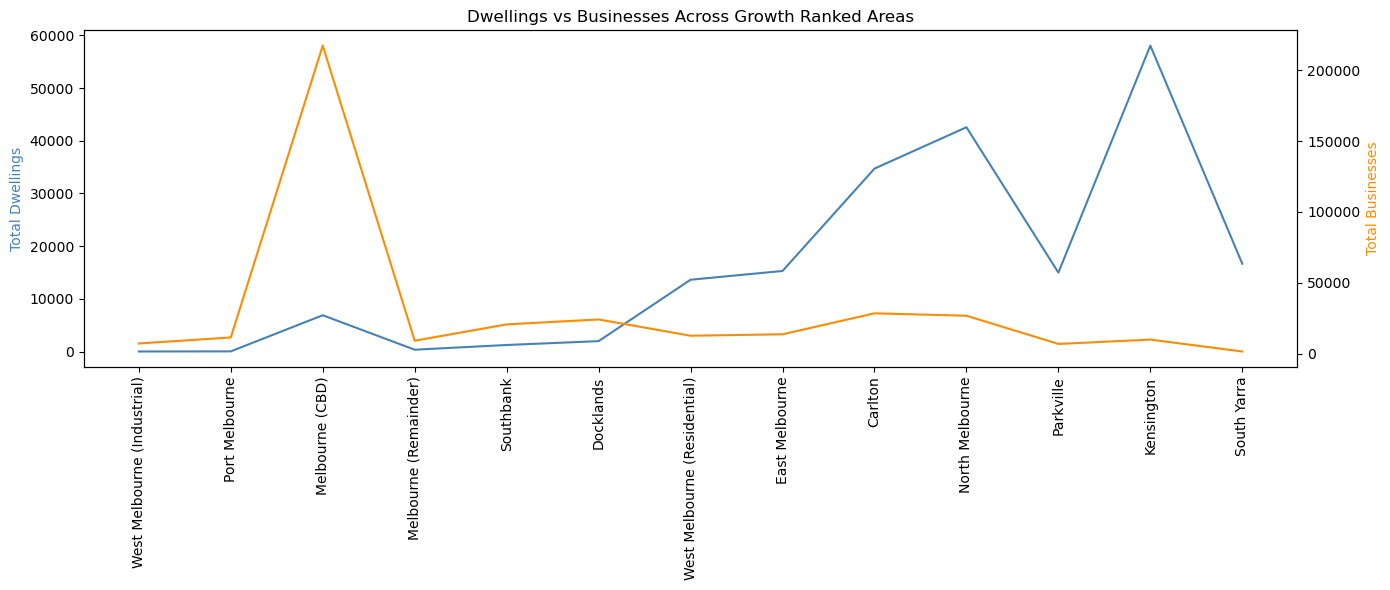

In [201]:
import matplotlib.pyplot as plt

# Step 1: Sort areas by growth score
ordered = area_profile_cleaned.sort_values("growth_score", ascending=False)

# Step 2: Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Step 3: Plot total dwellings on primary Y-axis
ax1.plot(ordered["clue_small_area"], ordered["total_dwellings"], color='steelblue', label='Total Dwellings')
ax1.set_ylabel("Total Dwellings", color='steelblue')

# Step 4: Plot total businesses on secondary Y-axis
ax2.plot(ordered["clue_small_area"], ordered["total_businesses"], color='darkorange', label='Total Businesses')
ax2.set_ylabel("Total Businesses", color='darkorange')

# Step 5: Fix x-ticks safely
ax1.set_xticks(range(len(ordered)))  # Explicit tick positions
ax1.set_xticklabels(ordered["clue_small_area"], rotation=90)

plt.title("Dwellings vs Businesses Across Growth Ranked Areas")
plt.tight_layout()
plt.show()


<h3>Line Plot: Cumulative Dwellings vs Businesses (Ordered by Growth Score)</h3>
<p>
This line chart shows how cumulative totals of <strong>dwellings</strong> and <strong>businesses</strong> evolve as we move through areas ranked by <strong>growth score</strong>.
</p>

<h4>Purpose:</h4>
<ul>
  <li>Visualize the <strong>contribution of top-ranked areas</strong> to overall urban density</li>
  <li>Reveal whether <em>growth is concentrated or distributed</em> among many zones</li>
</ul>

<h4>Insights:</h4>
<ul>
  <li>The first few areas contribute significantly to cumulative totals — showing urban centralization.</li>
  <li><strong>Business growth accumulates faster</strong> than dwellings, revealing commercial concentration.</li>
  <li>Lower-ranked areas have limited impact — suggesting room for development or underutilization.</li>
</ul>


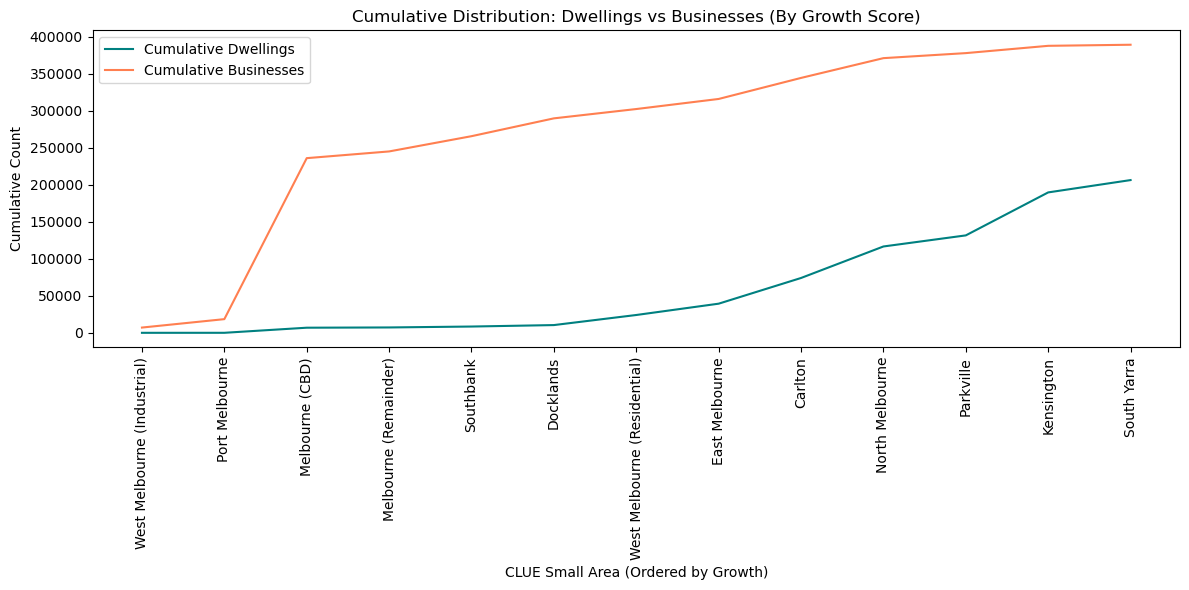

In [204]:
# Sort by growth score
ordered = area_profile_cleaned.sort_values("growth_score", ascending=False)

# Calculate cumulative totals
ordered["cumulative_dwellings"] = ordered["total_dwellings"].cumsum()
ordered["cumulative_businesses"] = ordered["total_businesses"].cumsum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ordered["clue_small_area"], ordered["cumulative_dwellings"], label="Cumulative Dwellings", color="teal")
plt.plot(ordered["clue_small_area"], ordered["cumulative_businesses"], label="Cumulative Businesses", color="coral")
plt.xticks(rotation=90)
plt.title("Cumulative Distribution: Dwellings vs Businesses (By Growth Score)")
plt.xlabel("CLUE Small Area (Ordered by Growth)")
plt.ylabel("Cumulative Count")
plt.legend()
plt.tight_layout()
plt.show()


<h3>Radar Chart: Top 5 Growth Areas</h3>
<p>
This radar chart visualizes the <strong>standardized profiles</strong> of the top 5 CLUE small areas based on their growth score, across 5 metrics:
</p>
<ul>
  <li>Total Dwellings</li>
  <li>Total Businesses</li>
  <li>Unique Industries</li>
  <li>Business-to-Dwelling Ratio</li>
  <li>Growth Score</li>
</ul>

<h4>Purpose:</h4>
<p>
To identify which areas are <strong>balanced performers</strong> vs those with specific strengths (e.g., high business, low housing).
</p>

<h3>Insights (Brief)</h3>
<ul>
  <li><strong>West Melbourne (Industrial)</strong> stands out with the highest growth score and business-to-dwelling ratio.</li>
  <li><strong>Melbourne (CBD)</strong> is strong in total dwellings and businesses but lower in growth score.</li>
  <li><strong>Port Melbourne</strong> shows balanced performance with good diversity and moderate growth.</li>
  <li><strong>Southbank</strong> and <strong>Melbourne (Remainder)</strong> have steady, mid-range profiles.</li>
  <li>The radar chart highlights how each area has distinct strengths across the five metrics.</li>
</ul>



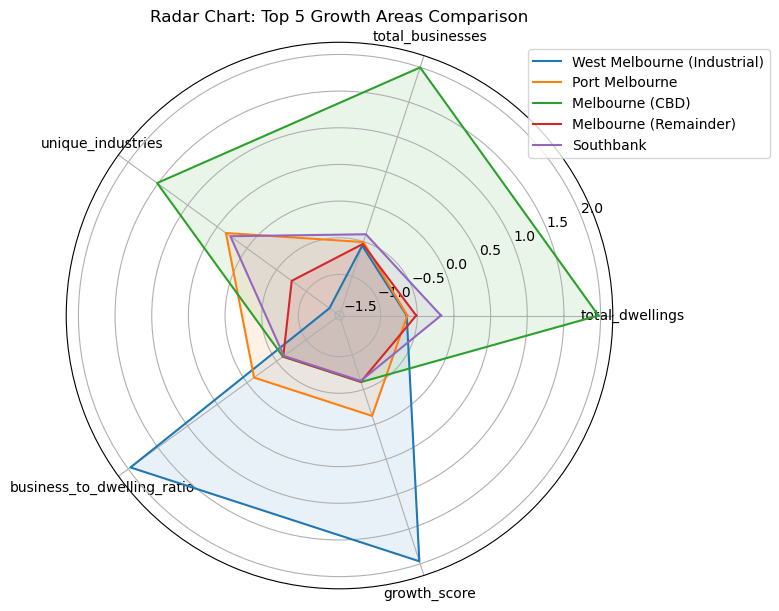

In [207]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select top 5 areas
top5 = area_profile_cleaned.sort_values("growth_score", ascending=False).head(5).copy()

# Step 2: Define features and scale them
radar_features = ["total_dwellings", "total_businesses", "unique_industries", "business_to_dwelling_ratio", "growth_score"]
scaler = StandardScaler()
top5_scaled = pd.DataFrame(scaler.fit_transform(top5[radar_features]), columns=radar_features, index=top5["clue_small_area"])

# Step 3: Define radar chart angles
labels = radar_features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # complete loop

# Step 4: Create the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for index, row in top5_scaled.iterrows():
    values = row.tolist()
    values += values[:1]  # loop back
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)

# Step 5: Customize
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart: Top 5 Growth Areas Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


<h2>Final Analysis, Conclusion & Recommendations</h2>

<h3>📊 Analysis</h3>
<p>
This project successfully integrated residential and business datasets to model urban land use and forecast growth potential across Melbourne's CLUE small areas. Feature engineering produced meaningful metrics such as <code>business_to_dwelling_ratio</code>, <code>industry_diversity_score</code>, and a composite <code>growth_score</code>.
</p>

<ul>
  <li><strong>Zoning Classification:</strong> Zones were labeled as Residential, Commercial, or Mixed-use using thresholds on business-to-dwelling ratios. Supervised models including Random Forest, SVM (Linear), and Decision Tree were evaluated. All models achieved high accuracy, with SVM and Random Forest scoring near or at 100% in cross-validation.</li>

  <li><strong>Business Recommendation:</strong> A MultiOutput Random Forest Classifier was trained to recommend suitable industries based on local features. For both residential and mixed-use sample profiles, the model identified the top 10 most relevant industries using prediction probabilities.</li>

  <li><strong>Growth Forecasting:</strong> A custom growth score was calculated using a weighted combination of industry diversity, business density, and unique industry share. The top 10 potenial high-growth areas—such as West Melbourne, Melbourne CBD, Docklands, and Southbank—were identified based on this metric.</li>
</ul>

<h3>Conclusion</h3>
<p>
The models and visual insights generated in this project demonstrate the value of data-driven approaches in urban analysis and planning. Zoning classification performed exceptionally well, business recommendations aligned with economic patterns, and the growth score successfully highlighted areas with high development potential.
</p>

<h3>Recommendations</h3>
<ul>
  <li>Apply the trained zoning classifier to future land parcels or new developments to assist in zoning decisions.</li>
  <li>Use the business recommendation engine to guide economic development strategies in mixed-use and underdeveloped zones.</li>
  <li>Focus investment and infrastructure expansion on top-ranked areas from the growth score ranking.</li>
  <li>Update the models regularly using refreshed datasets to capture ongoing urban trends and support dynamic planning.</li>
  <li>Expand the feature set to include location proximity, transportation access, and property values for more robust modeling.</li>
</ul>

<p>
This project provides a strong foundation for scalable and evidence-based urban planning strategies in Melbourne.
</p>


<h2>References</h2>

<ul>
  <li>
    Scikit-learn Developers. (2023). <em>Scikit-learn: Machine learning in Python</em>. 
    <a href="https://scikit-learn.org/stable/" target="_blank">https://scikit-learn.org/stable/</a>  
    – Library used for classification, clustering, and model evaluation.
  </li>

  <li>
    Seaborn Documentation. (2023). <em>Statistical data visualization</em>. 
    <a href="https://seaborn.pydata.org" target="_blank">https://seaborn.pydata.org</a>  
    – Used for visual analytics and insight generation.
  </li>
</ul>
